In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [23]:
df = pd.read_csv('df.csv', index_col=0)

num_cols_final = ['NP_concentration',
 'ZOI_drug',
 'ZOI_drug_NP',
 'fold_increase_in_antibacterial_activity (%)',
 'avg_NP_size',
 'lg_Drug_dose',
 'NumHAcceptors',
 'MolLogP',
 'RingCount',
 'NumAliphaticRings',
 'NumAromaticRings',
 'NumAromaticHeterocycles',
 'MinPartialCharge',
 'MaxPartialCharge',
 'BertzCT',
 'pKa']

df_cat = df.drop(columns=num_cols_final)

all_cat_cols = df_cat.columns.tolist()


In [24]:
df

,Bacteria,NP_Synthesis,Drug,Drug_class_drug_bank,NP_concentration,avg_NP_size,shape,method,ZOI_drug,ZOI_drug_NP,...,MolWt,Chi0,RingCount,TPSA,NumAliphaticRings,NumAromaticRings,NumAromaticHeterocycles,MinPartialCharge,MaxPartialCharge,BertzCT
0,Escherichia coli,chem_synthesis,amoxicillin,Lactams,30.0,8.0,spherical,MIC,32.0,32.000,...,365.411,18.516143,3,132.96,2,1,0,-0.507967,0.327399,735.790665
1,Escherichia coli,chem_synthesis,penicillin,Carboxylic acids and derivatives,30.0,8.0,spherical,MIC,32.0,32.000,...,372.487,16.775656,3,89.54,2,1,0,-0.547832,1.000000,667.301074
2,Escherichia coli,chem_synthesis,amoxicillin,Lactams,30.0,28.0,spherical,MIC,32.0,32.000,...,365.411,18.516143,3,132.96,2,1,0,-0.507967,0.327399,735.790665
3,Escherichia coli,chem_synthesis,penicillin,Carboxylic acids and derivatives,30.0,28.0,spherical,MIC,32.0,32.000,...,372.487,16.775656,3,89.54,2,1,0,-0.547832,1.000000,667.301074
4,Micrococcus luteus,green_synthesis,vancomycin,Carboxylic acids and derivatives,100.0,21.0,spherical,disc_diffusion,0.0,17.000,...,1449.271,73.539265,12,530.49,7,5,0,-0.507810,0.330441,4074.499152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Staphylococcus aureus,chem_synthesis,penicillin,Carboxylic acids and derivatives,30.0,8.0,spherical,MIC,NaN,0.125,...,372.487,16.775656,3,89.54,2,1,0,-0.547832,1.000000,667.301074
553,Pseudomonas aeruginosa,green_synthesis,mupirocin,Fatty Acyls,30.0,60.0,spherical,MIC,NaN,0.100,...,500.629,25.957455,2,146.05,2,0,0,-0.481230,0.330185,692.309943
554,Pasteurella Multocida,chem_synthesis,penicillin,Carboxylic acids and derivatives,30.0,8.0,spherical,MIC,NaN,0.030,...,372.487,16.775656,3,89.54,2,1,0,-0.547832,1.000000,667.301074
555,Pasteurella Multocida,chem_synthesis,penicillin,Carboxylic acids and derivatives,30.0,28.0,spherical,MIC,NaN,0.030,...,372.487,16.775656,3,89.54,2,1,0,-0.547832,1.000000,667.301074


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 556
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Bacteria                                     547 non-null    object 
 1   NP_Synthesis                                 547 non-null    object 
 2   Drug                                         547 non-null    object 
 3   Drug_class_drug_bank                         547 non-null    object 
 4   NP_concentration                             547 non-null    float64
 5   avg_NP_size                                  547 non-null    float64
 6   shape                                        547 non-null    object 
 7   method                                       547 non-null    object 
 8   ZOI_drug                                     537 non-null    float64
 9   ZOI_drug_NP                                  547 non-null    float64
 10  fold_in

In [26]:
df_cat = df.drop(columns=num_cols_final)

all_cat_cols = df_cat.columns.tolist()
some_feat_to_drop = ['Smiles', 'min_max_NP_size', 'avg_Incub_period', 'growth_temp, C', 'biosafety_level', 'LabuteASA', 'NumHDonors', 'MolWt', 'Chi0', 'TPSA']
for i in some_feat_to_drop:
    all_cat_cols.remove(i)
all_cat_cols

['Bacteria',
 'NP_Synthesis',
 'Drug',
 'Drug_class_drug_bank',
 'shape',
 'method',
 'MDR_check',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'gram',
 'isolated_from']

In [27]:
# some_num_feat это не категориальные, но их распределение нигде ранее не строилось
'''for col in some_num_feat:
    sns.violinplot(df_dummy[col], orient='h', width=0.7, palette='pastel')
    plt.title(col)
    plt.show()
    
for col in in some_num_feat:
    sns.histplot(df_dummy[col], stat='probability')
    plt.title(col)
    plt.show()
    
    
    '''

"for col in some_num_feat:\n    sns.violinplot(df_dummy[col], orient='h', width=0.7, palette='pastel')\n    plt.title(col)\n    plt.show()\n    \nfor col in in some_num_feat:\n    sns.histplot(df_dummy[col], stat='probability')\n    plt.title(col)\n    plt.show()\n    \n    \n    "

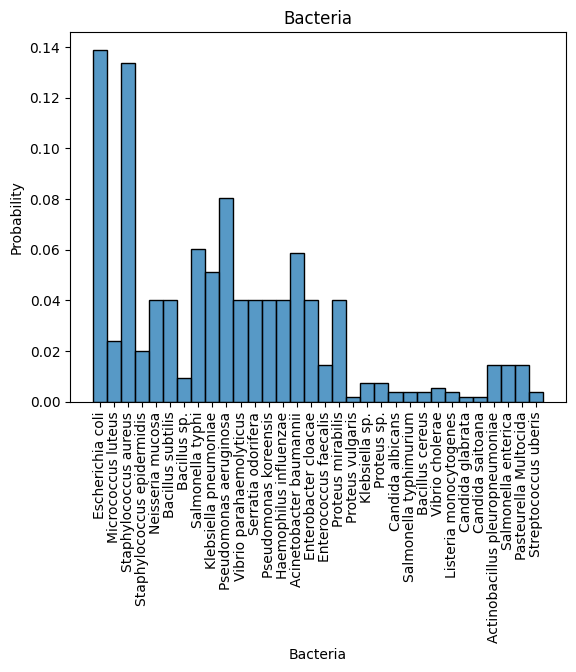

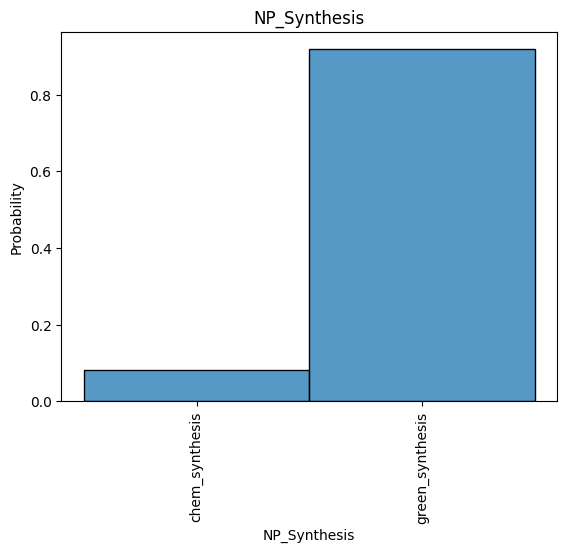

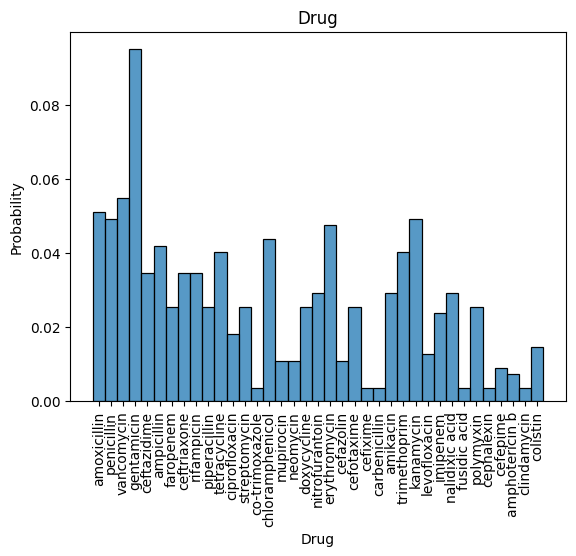

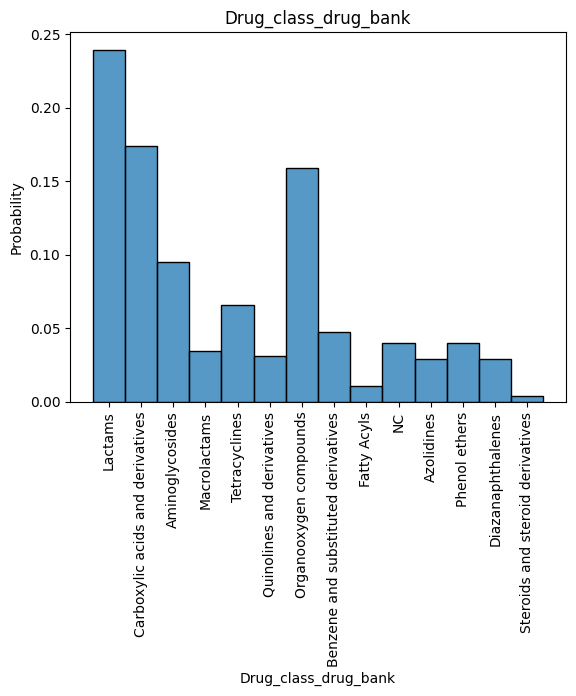

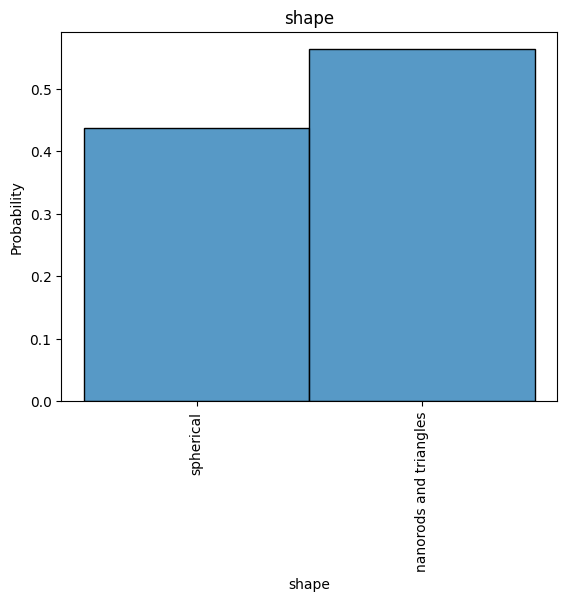

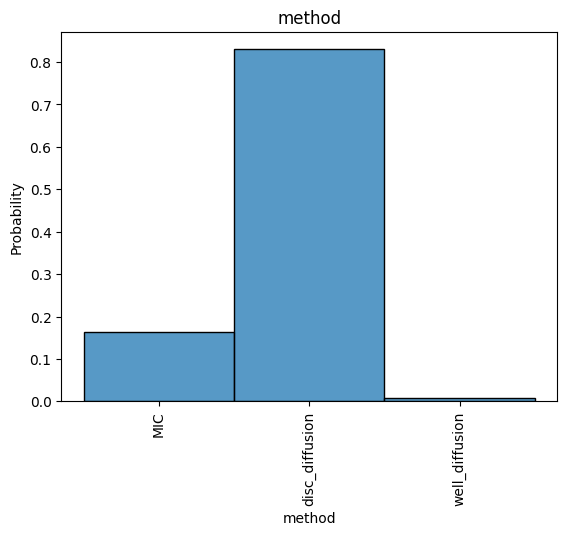

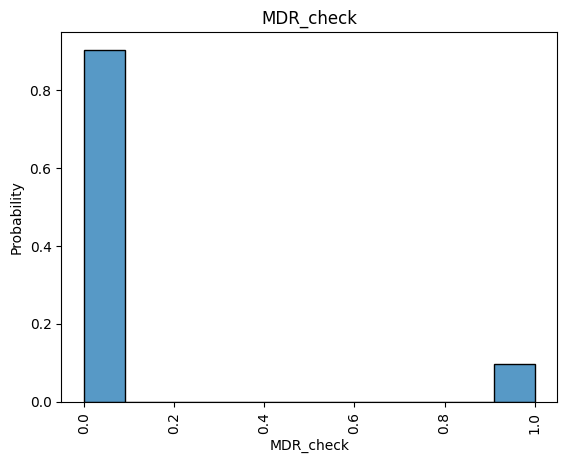

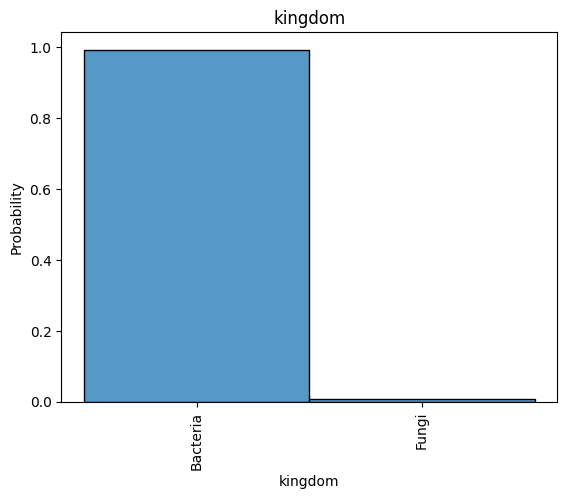

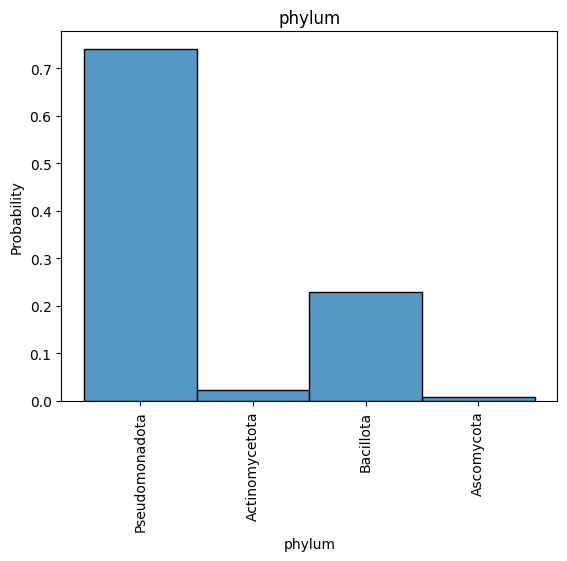

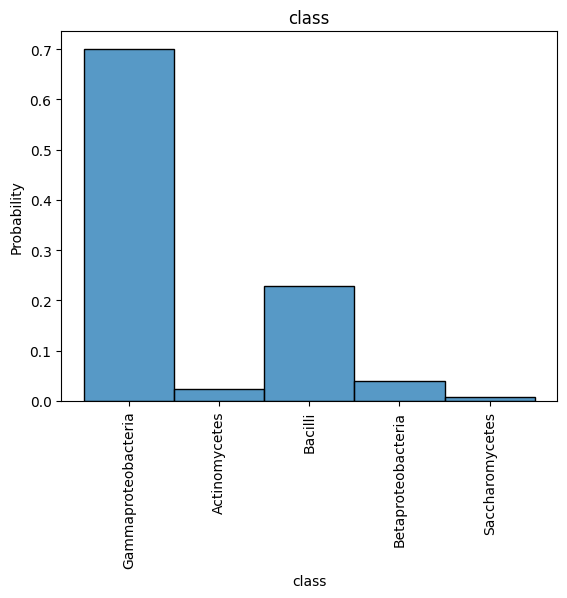

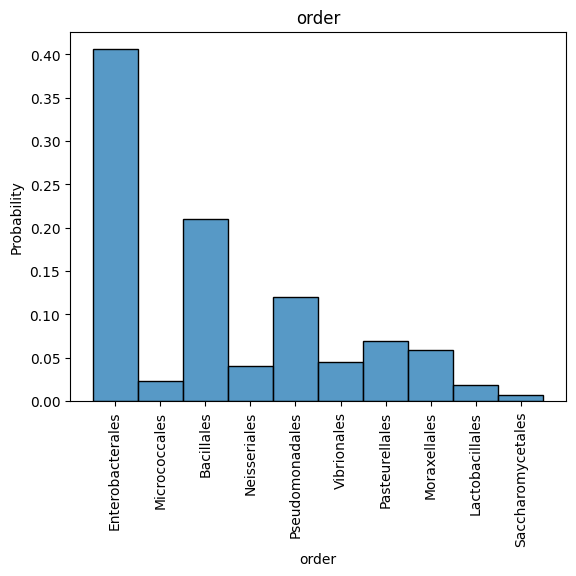

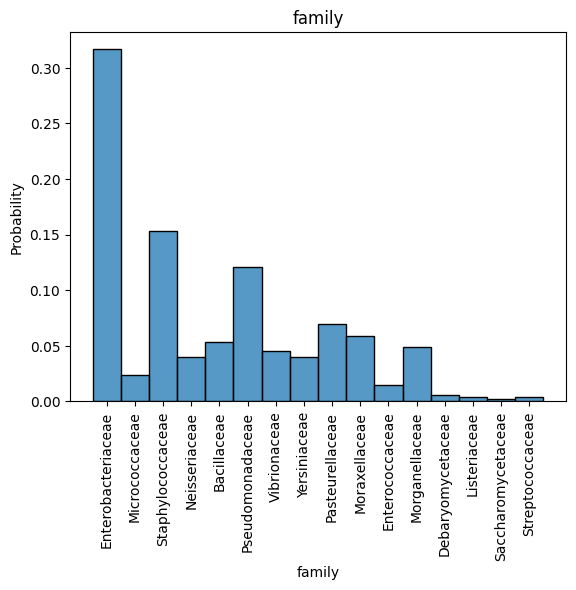

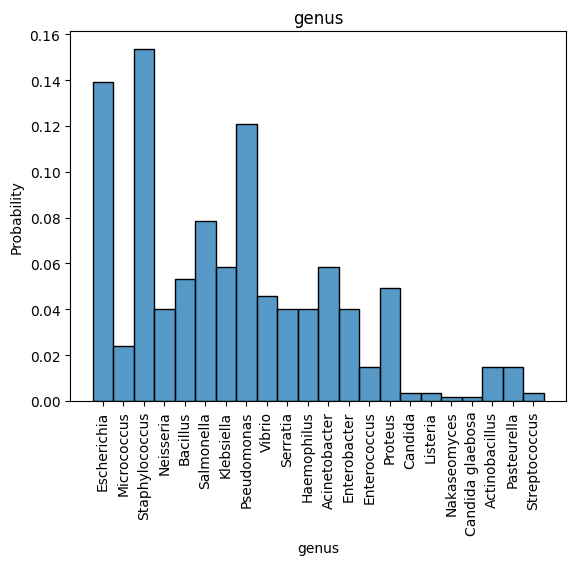

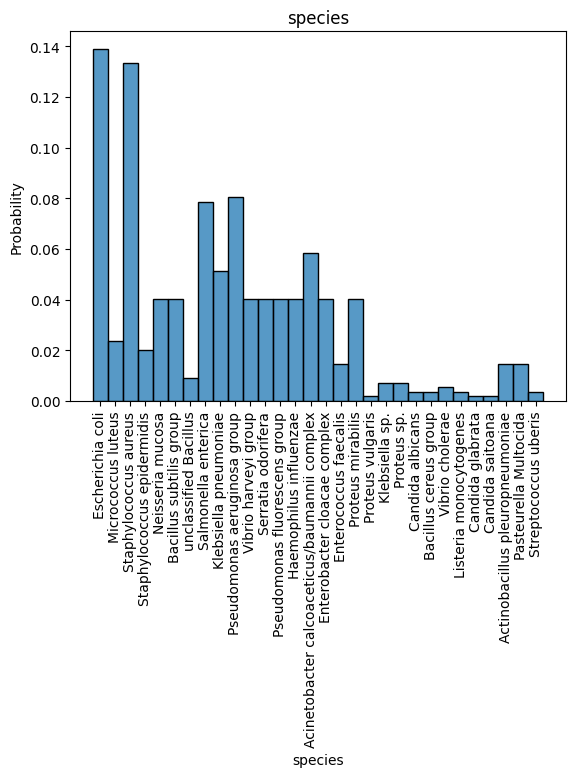

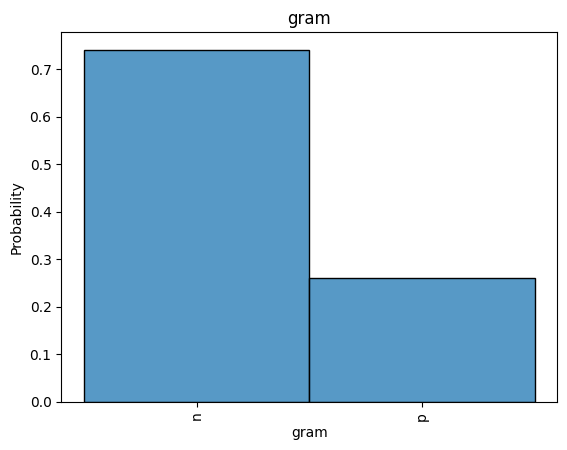

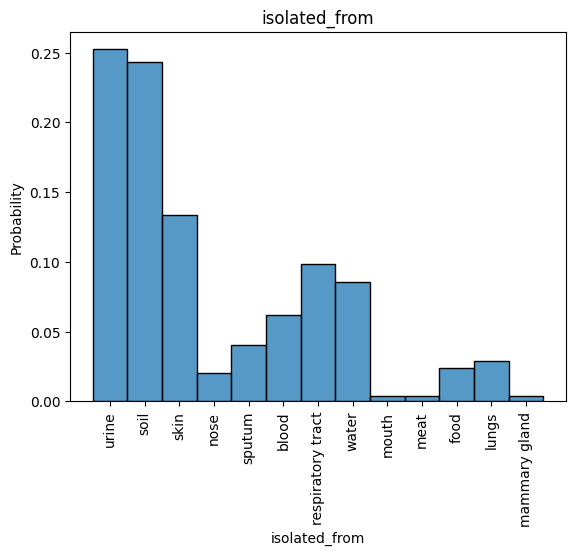

In [28]:
for col in all_cat_cols:
    sns.histplot(df[col], stat='probability')
    plt.title(col)
    plt.tick_params(axis='x', rotation=90)
    plt.show()

Распределение категориальных признаков влияет на работу модели машинного обучения. Случай равномерного распределения является лучшим вариантом, так как в этом случае каждое значение категориального признака будет вносить равнозначный статистический вес. Например, в случае фичи kingdom  у нас наблудается значительное превосходство образцов bacteria над fungi, значит есть эта фича не будет вносить значительного вклада в модель. А вот в случае фичей shape, drug, bacteria, genus, species можно ожидать, что они внесут некоторый ощутимый вклад в работу модели.

In [29]:
"""for col in all_cat_cols:
    sns.violinplot(df[col], orient='h', width=0.7, palette='pastel')
    plt.title(col)
    plt.show()"""

"for col in all_cat_cols:\n    sns.violinplot(df[col], orient='h', width=0.7, palette='pastel')\n    plt.title(col)\n    plt.show()"